In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from skimage.io import imshow,imread
from PIL import Image


In [ ]:
first=imageio.imread('/content/1.gif')
print(first)
print()
fourth=imageio.imread('/content/4.gif')
second=imageio.imread('/content/2.gif')
third=imageio.imread('/content/3.gif')
df1=np.loadtxt("/content/river.txt",dtype=np.int64,delimiter=",")
X=df1[:,0:1]
Y=df1[:,1:2]
print(X)
df0=np.loadtxt("/content/Nonriver.txt",dtype=np.int64,delimiter=",")
X2=df0[:,0:1]
Y2=df0[:,1:2]

#print(X2)

[[41 41 38 ... 41 41 41]
 [41 42 41 ... 44 41 41]
 [41 43 39 ... 42 40 40]
 ...
 [39 38 38 ... 38 39 37]
 [40 39 40 ... 38 39 37]
 [41 42 42 ... 38 38 37]]

[[210]
 [216]
 [206]
 [219]
 [162]
 [171]
 [194]
 [192]
 [178]
 [176]
 [190]
 [172]
 [163]
 [166]
 [161]
 [164]
 [165]
 [175]
 [168]
 [159]
 [149]
 [136]
 [140]
 [183]
 [170]
 [164]
 [211]
 [165]
 [173]
 [167]
 [167]
 [158]
 [156]
 [191]
 [192]
 [180]
 [163]
 [170]
 [170]
 [164]
 [155]
 [166]
 [173]
 [157]
 [146]
 [200]
 [209]
 [181]
 [164]
 [186]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def cal_cov(x,y):
    m=len(x)
    xmean,ymean=np.mean(x),np.mean(y)
    x=x-xmean
    y=y-ymean
    temp=np.transpose(x)*y
    temp=temp/m
    return temp[0,0]

##calculating covariance matrix for River dataset
intensity=[]
green=[]
red=[]
blue=[]


for i in range(0,len(X)):
    red.append(first[X[i],Y[i]])
    green.append(second[X[i],Y[i]])
    blue.append(third[X[i],Y[i]])
    intensity.append(fourth[X[i],Y[i]])

blue = np.matrix(blue)
red = np.matrix(red)
green = np.matrix(green)
intensity = np.matrix(intensity)

#print("** ",red)

river_mean=np.matrix([np.mean(red),np.mean(green),np.mean(blue),np.mean(intensity)])

print("The river mean matrix is",river_mean)

#calculating the river co-variance matrix
rivercov_matrix=[[cal_cov(red,red),cal_cov(red,green),cal_cov(red,blue),cal_cov(red,intensity)],
   [cal_cov(green,red),cal_cov(green,green),cal_cov(green,blue),cal_cov(green,intensity)],
   [cal_cov(blue,red),cal_cov(blue,green),cal_cov(blue,blue),cal_cov(blue,intensity)],
   [cal_cov(intensity,red),cal_cov(intensity,green),cal_cov(intensity,blue),cal_cov(intensity,intensity)]]

rivercov_matrix=np.matrix(rivercov_matrix)

print("The covariance matrix for River is",rivercov_matrix)

##calculating covariance matrix for non-river dataset
red=[]
green=[]
blue=[]
intensity=[]

for i in range(0,len(X2)):
    red.append(first[X2[i],Y2[i]])
    green.append(second[X2[i],Y2[i]])
    blue.append(third[X2[i],Y2[i]])
    intensity.append(fourth[X2[i],Y2[i]])
    
red=np.matrix(red)
green=np.matrix(green)
blue=np.matrix(blue)
intensity=np.matrix(intensity)

nonriver_mean=np.matrix([np.mean(red),np.mean(green),np.mean(blue),np.mean(intensity)])

print("The nonriver mean matrix is",nonriver_mean)
#Calculating the Covariance matrix
nonrivercov_matrix=[[cal_cov(red,red),cal_cov(red,green),cal_cov(red,blue),cal_cov(red,intensity)],
   [cal_cov(green,red),cal_cov(green,green),cal_cov(green,blue),cal_cov(green,intensity)],
   [cal_cov(blue,red),cal_cov(blue,green),cal_cov(blue,blue),cal_cov(blue,intensity)],
   [cal_cov(intensity,red),cal_cov(intensity,green),cal_cov(intensity,blue),cal_cov(intensity,intensity)]]
nonrivercov_matrix=np.matrix(nonrivercov_matrix)

print("The covariance matrix for Non-River is",nonrivercov_matrix)

The river mean matrix is [[41.8  27.16 28.68 34.64]]
The covariance matrix for River is [[ 7.32    7.112   7.476   1.208 ]
 [ 7.112   8.2944  9.7712  2.6176]
 [ 7.476   9.7712 21.6976  6.6848]
 [ 1.208   2.6176  6.6848 32.1104]]
The nonriver mean matrix is [[40.32 25.75 26.3  35.26]]
The covariance matrix for Non-River is [[ 7.7376  7.04    9.154   2.2468]
 [ 7.04    7.2275  9.275   2.825 ]
 [ 9.154   9.275  14.89    2.582 ]
 [ 2.2468  2.825   2.582  29.5324]]


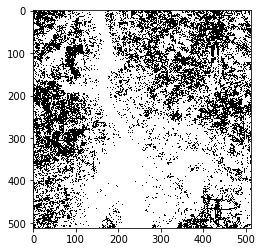

In [ ]:
##creating test-data
outimage=[]

capitalp1=0.7
capitalp2=0.3

for i in range(0,512):
    
    temp=[]
    
    for j in range(0,512):
        
        test_data=[first[i,j],second[i,j],third[i,j],fourth[i,j]]
        test_data=np.matrix(test_data)
        
        test_data1=test_data-river_mean
        
        test_data2=test_data-nonriver_mean
        
        riverclass=test_data1*np.linalg.inv(rivercov_matrix)*np.transpose(test_data1)
        
        nonriverclass=test_data2*np.linalg.inv(nonrivercov_matrix)*np.transpose(test_data2)
        
        smallp1=-(0.5)*(1/np.sqrt(np.linalg.det(rivercov_matrix)))*np.exp(riverclass)
        
        smallp2=-(0.5)*(1/np.sqrt(np.linalg.det(nonrivercov_matrix)))*np.exp(nonriverclass)
        
        if((capitalp1*smallp1)>=(capitalp2*smallp2)):
            temp.append(255)
        else:
            temp.append(0)
            
    outimage.append(temp)
temp = outimage
outimage=np.uint8(np.array(outimage))
plt.imshow(outimage,cmap='gray')
#Writing the output image
imageio.imwrite('sampleoutput.jpeg',outimage[:,:])
